In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.manual_seed(42)
import torchvision

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import models
import unet
import utils

In [3]:
root = "/cluster/tufts/hugheslab/eharve06/MNIST"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=32),
])
train_dataset = torchvision.datasets.MNIST(root=root, train=True, transform=transform, download=True)

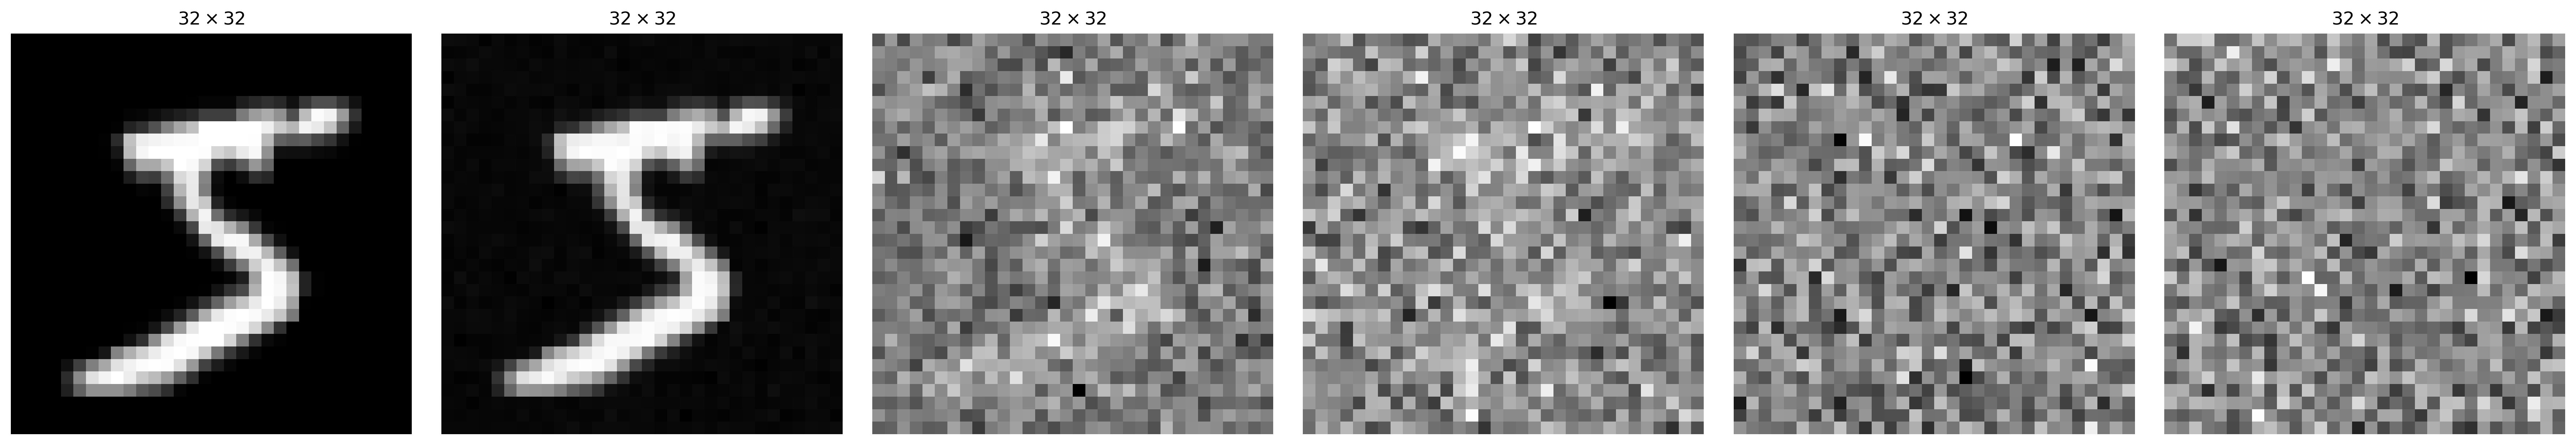

In [4]:
x_0 = train_dataset[0][0]

betas = torch.tensor([0.00010001659393310547, 0.47586220502853394, 0.8500487804412842, 0.9573652148246765, 0.9879547357559204])
betas = torch.linspace(1e-4, 0.9, 5)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)

ncols, nrows = 6, 1

fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

axs[0].imshow(x_0.permute(1, 2, 0), cmap="gray", vmin=x_0.min(), vmax=x_0.max())
axs[0].axis("off")
axs[0].set_title(rf"${x_0.shape[1]}\times{x_0.shape[2]}$")

t = 0
alpha_bar_t = alphas_cumprod[t]

eps = torch.randn_like(x_0)
x_t = torch.sqrt(alpha_bar_t) * x_0 + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[1].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[1].axis("off")
axs[1].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 1
alpha_bar_t = alphas_cumprod[t]

eps = torch.randn_like(x_0)
x_t = torch.sqrt(alpha_bar_t) * x_0 + \
      torch.sqrt(1 - alpha_bar_t) * eps
norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[2].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[2].axis("off")
axs[2].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 2
alpha_bar_t = alphas_cumprod[t]

eps = torch.randn_like(x_0)
x_t = torch.sqrt(alpha_bar_t) * x_0 + \
      torch.sqrt(1 - alpha_bar_t) * eps
norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[3].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[3].axis("off")
axs[3].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 3
alpha_bar_t = alphas_cumprod[t]

eps = torch.randn_like(x_0)
x_t = torch.sqrt(alpha_bar_t) * x_0 + \
      torch.sqrt(1 - alpha_bar_t) * eps
norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[4].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[4].axis("off")
axs[4].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 4
alpha_bar_t = alphas_cumprod[t]

eps = torch.randn_like(x_0)
x_t = torch.sqrt(alpha_bar_t) * x_0 + \
      torch.sqrt(1 - alpha_bar_t) * eps
norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[5].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[5].axis("off")
axs[5].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

fig.tight_layout()
fig.savefig("denoising.pdf", bbox_inches="tight")
plt.show()

tensor(4.0358e-05)


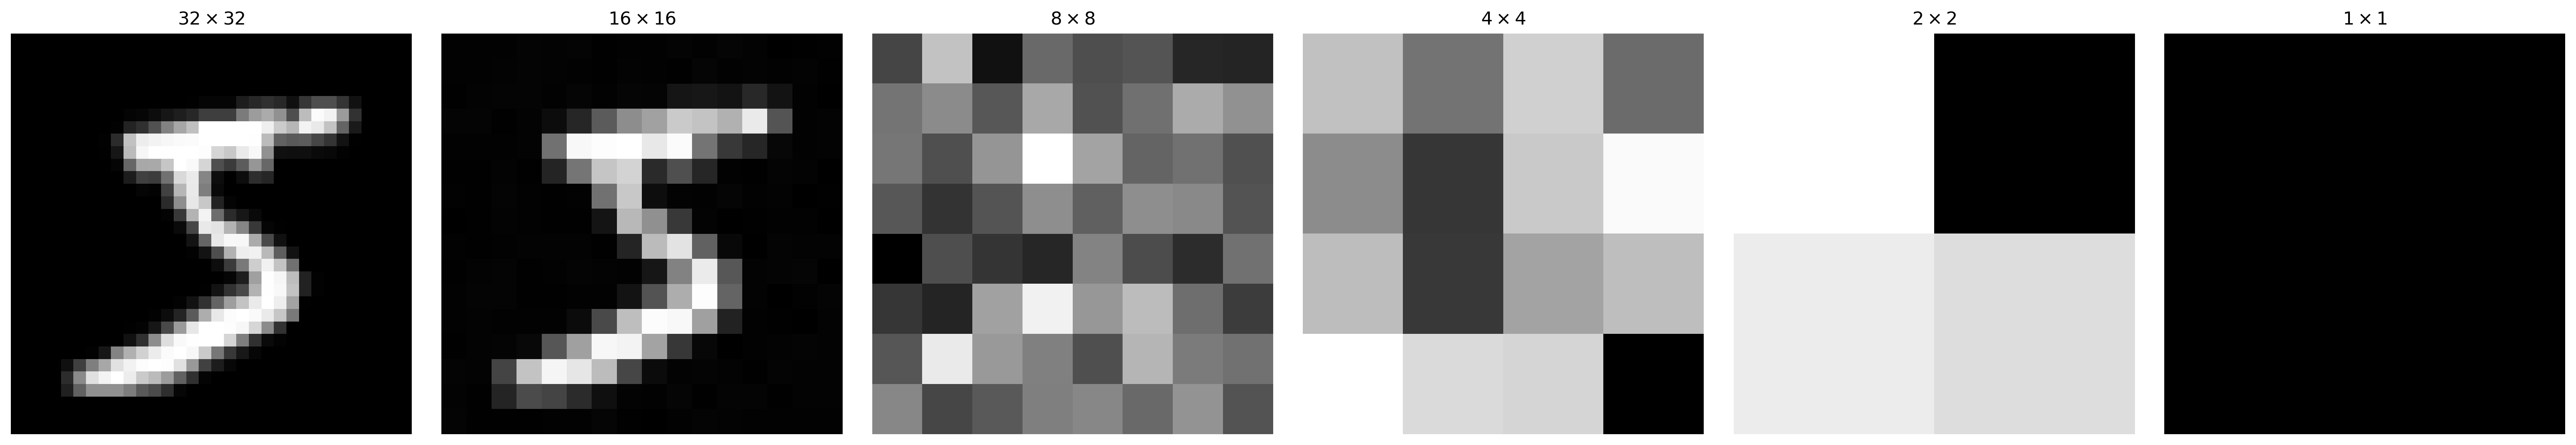

In [5]:
x_0 = train_dataset[0][0]

betas = torch.tensor([0.00010001659393310547, 0.47586220502853394, 0.8500487804412842, 0.9573652148246765, 0.9879547357559204])
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)

ncols, nrows = 6, 1

fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

axs[0].imshow(x_0.permute(1, 2, 0), cmap="gray", vmin=x_0.min(), vmax=x_0.max())
axs[0].axis("off")
axs[0].set_title(rf"${x_0.shape[1]}\times{x_0.shape[2]}$")

t = 0
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[1].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[1].axis("off")
axs[1].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 1
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[2].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[2].axis("off")
axs[2].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 2
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[3].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[3].axis("off")
axs[3].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 3
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[4].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[4].axis("off")
axs[4].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 4
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[5].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=x_t.min(), vmax=x_t.max())
axs[5].axis("off")
axs[5].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

fig.tight_layout()
fig.savefig("upscaling_denoising.pdf", bbox_inches="tight")
plt.show()

In [766]:
eps_model = unet.UNet(image_channels=1)
model = models.DDPM(eps_model=eps_model, T=5)

# This is the $T=1000$ model
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_DDPM_T=1000/batch_size=32_epochs=1000_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)

# This is the $T=5$ model
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_DDPM_T=5/batch_size=32_epochs=1000_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)

model.load_state_dict(checkpoint)

<All keys matched successfully>

In [767]:
batch_size = 36
x_T = torch.randn(size=(batch_size, 1, 32, 32))
x_ts = [x_T]

ts = torch.arange(start=0, end=model.T)
alphas = 1.0 - model.betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

model.eval()
with torch.no_grad():
    
    for t in tqdm.tqdm(reversed(ts)):
        
        logits = model.eps_model(x_ts[-1], torch.full((batch_size,), t))
        mean = sqrt_recip_alphas[t] * (x_ts[-1] - model.betas[t] / sqrt_one_minus_alphas_cumprod[t] * logits)

        if t > 0:
            noise = torch.randn_like(mean)
            sigma = torch.sqrt(model.betas[t] * (1.0 - alphas_cumprod[t - 1]) / (1.0 - alphas_cumprod[t]))
            x_ts.append(mean + sigma * noise)
        else:
            x_ts.append(mean)

100%|██████████| 5/5 [00:12<00:00,  2.45s/it]


In [768]:
ncols, nrows = 6, 6
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i in range(6):
    for j in range(6):
    
        axs[i,j].imshow(x_ts[-1][(i*6)+j].permute(1, 2, 0), cmap="gray", vmin=x_ts[-1][(i*6)+j].min(), vmax=x_ts[-1][(i*6)+j].max())
        axs[i,j].axis("off")

fig.tight_layout()

plt.show()

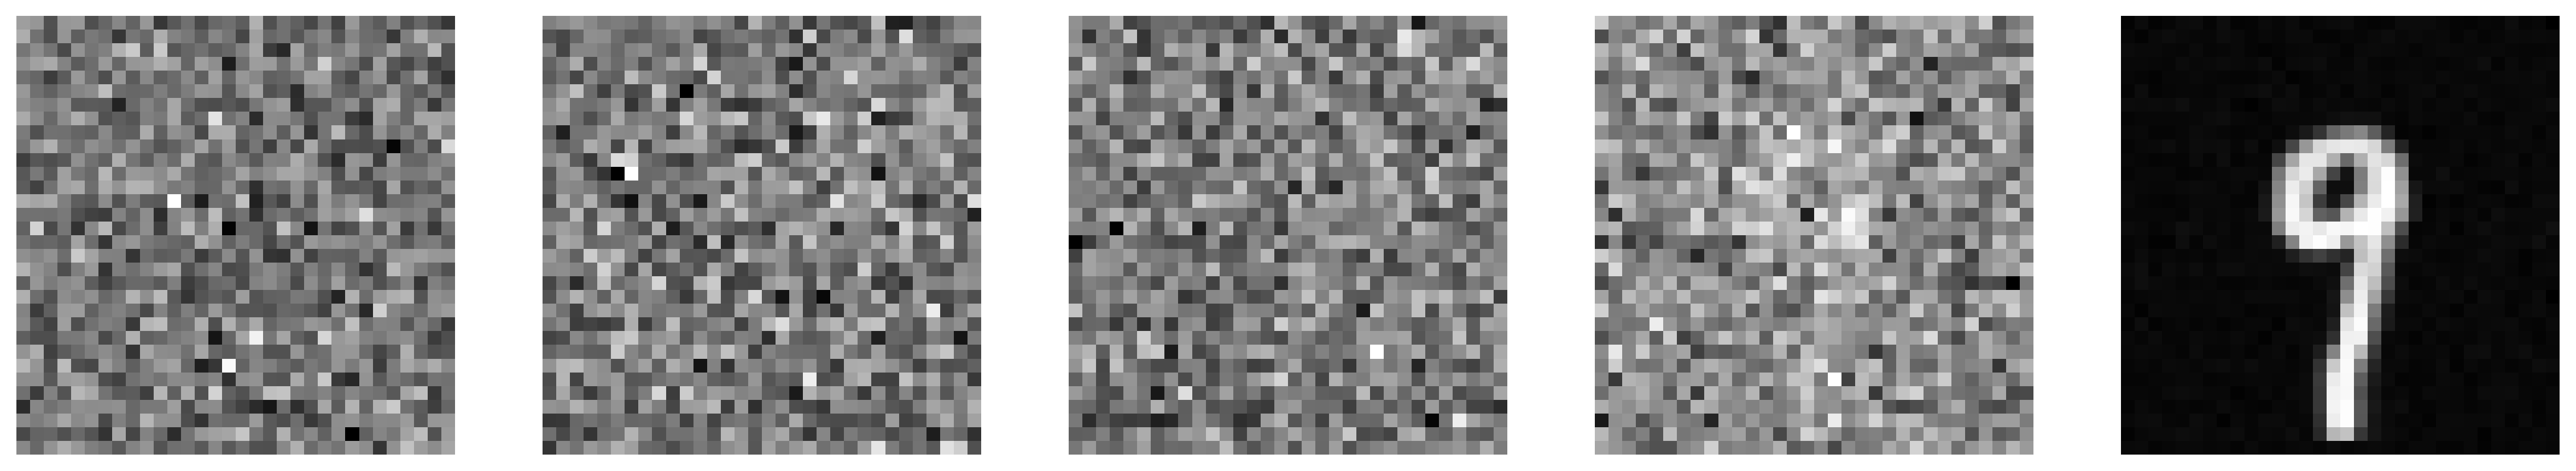

In [687]:
ts = [0, 249, 499, 749, 999]
#ts = [0, 1, 2, 3, 4]

ncols, nrows = 5, 1
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i, t in enumerate(ts):
    
    axs[i].imshow(x_ts[t][0].permute(1, 2, 0), cmap="gray", vmin=x_ts[t][0].min(), vmax=x_ts[t][0].max())
    axs[i].axis("off")

plt.show()

In [462]:
eps_model = unet.UpscaleUNet(image_channels=1)
model = models.UpscalingDDPM(eps_model=eps_model, T=5)

# This is an old model that uses the UpscaleUNet and predicts x_bar_0.
checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST/batch_size=32_epochs=1000_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)

model.load_state_dict(checkpoint)

<All keys matched successfully>

In [466]:
batch_size = 36
#x_T = 0.2 + 0.1 * torch.randn(size=(batch_size, 1, 1, 1))
x_T = 0.2 + 0.1 * torch.randn(size=(batch_size, 1, 2, 2))
x_ts = [x_T]

ts = torch.arange(start=0, end=model.T-1)
alphas = 1.0 - model.betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

model.eval()

with torch.no_grad():
    
    for t in reversed(ts):

        mean = model.eps_model(x_ts[-1], torch.full((batch_size,), t))
        
        if t > 0:
            noise = torch.randn_like(mean)
            sigma = torch.sqrt(model.betas[t])
            #x_ts.append(mean + sigma * noise)
            x_ts.append(mean)
        else:
            x_ts.append(mean)

In [467]:
ncols, nrows = 6, 6
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i in range(6):
    for j in range(6):
    
        axs[i,j].imshow(x_ts[-1][(i*6)+j].permute(1, 2, 0), cmap="gray", vmin=x_ts[-1][(i*6)+j].min(), vmax=x_ts[-1][(i*6)+j].max())
        axs[i,j].axis("off")

fig.tight_layout()

plt.show()

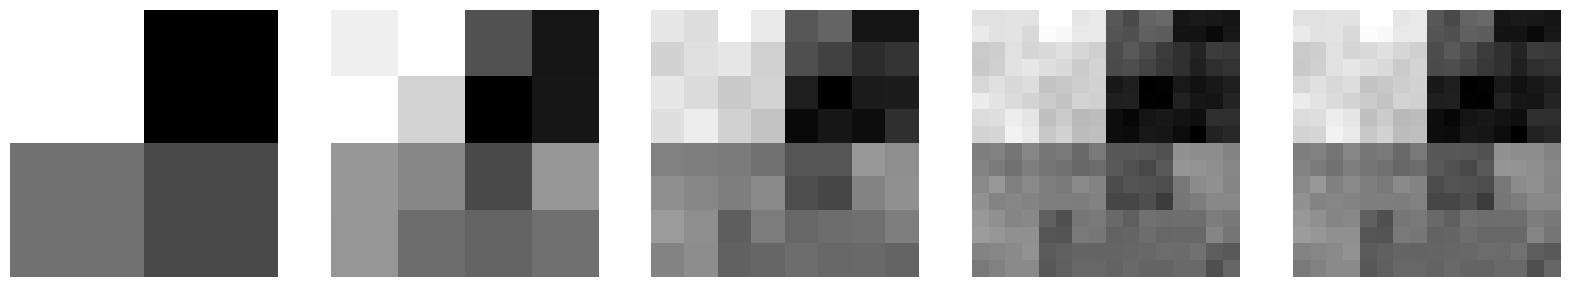

In [506]:
ts = [1, 2, 3, 4, 5]

ncols, nrows = 5, 1
fig, axs = plt.subplots(figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i, t in enumerate(ts):
    
    axs[i].imshow(x_ts[t][0].permute(1, 2, 0), cmap="gray", vmin=x_ts[t][0].min(), vmax=x_ts[t][0].max())
    axs[i].axis("off")

plt.show()

In [845]:
eps_model = unet.UNet(image_channels=1)
model = models.UpscalingDDPM(eps_model=eps_model, T=5)

# These models were trained with a different forward process. Noise was added to upscaled image.
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM_noise=low_T=5/batch_size=32_epochs=1000_loss=simple_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM_noise=low_T=5/batch_size=32_epochs=1000_loss=weighted_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM_noise=high_T=5/batch_size=32_epochs=1000_loss=simple_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM_noise=high_T=5/batch_size=32_epochs=1000_loss=weighted_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)

# These are the most recent models
# This is our best model. There is basically no noise.
checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM2_noise=low_T=5/batch_size=32_epochs=1000_loss=simple_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM2_noise=low_T=5/batch_size=32_epochs=1000_loss=weighted_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM2_noise=high_T=5/batch_size=32_epochs=1000_loss=simple_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM2_noise=high_T=5/batch_size=32_epochs=1000_loss=weighted_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
#checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_UpscalingDDPM2_noise=high_num_samples=5_T=5/batch_size=32_epochs=1000_loss=weighted_lr=0.01_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)

model.load_state_dict(checkpoint)

<All keys matched successfully>

In [846]:
batch_size = 36
x_T = 0.1309 + 0.2892 * torch.randn(size=(batch_size, 1, 1, 1))
#x_T = torch.randn(size=(batch_size, 1, 1, 1))
x_ts = [x_T]

ts = torch.arange(start=0, end=model.T)
alphas = 1.0 - model.betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

model.eval()

with torch.no_grad():
    
    for t in reversed(ts):

        x_t = torch.nn.functional.interpolate(x_ts[-1], scale_factor=2, mode="nearest")
        
        logits = model.eps_model(x_t, torch.full((batch_size,), t))
        mean = sqrt_recip_alphas[t] * (x_t - model.betas[t] / sqrt_one_minus_alphas_cumprod[t] * logits)
        
        if t > 0:
            noise = torch.randn_like(mean)   
            sigma = torch.sqrt(model.betas[t] * (1.0 - alphas_cumprod[t - 1]) / (1.0 - alphas_cumprod[t]))
            x_ts.append(mean + sigma * noise)
            #x_ts.append(mean)
        else:
            x_ts.append(mean)

In [847]:
ncols, nrows = 6, 6
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i in range(6):
    for j in range(6):
    
        axs[i,j].imshow(x_ts[-1][(i*6)+j].permute(1, 2, 0), cmap="gray", vmin=x_ts[-1][(i*6)+j].min(), vmax=x_ts[-1][(i*6)+j].max())
        axs[i,j].axis("off")

fig.tight_layout()

plt.show()

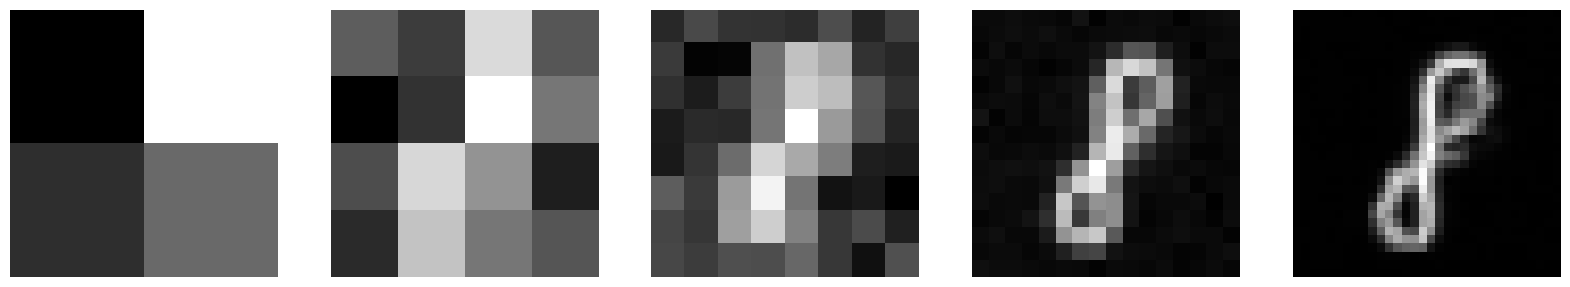

In [848]:
ts = [1, 2, 3, 4, 5]

ncols, nrows = 5, 1
fig, axs = plt.subplots(figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for i, t in enumerate(ts):
    
    axs[i].imshow(x_ts[t][0].permute(1, 2, 0), cmap="gray", vmin=x_ts[t][0].min(), vmax=x_ts[t][0].max())
    axs[i].axis("off")

plt.show()